# Principal Component Analysis 

## Overview 

In this exercise, you will perform a principal component analysis (PCA) using the data provided in the file data1.txt.

The file data1.txt contains information for 33 small molecules which are inhibitors of p38 MAP kinase.

The file contains the following information:
- column 1: log of dissociation rate constants (log koff, in log s-1)
- column 2: molecular weight (MW)
- column 3: topological polar surface area (TPSA)
- column 4: log of octanol-water partition coefficient (log P)
- column 5: number of hydrogen bond acceptors (HBA)
- column 6: number of hydrogen bond donors (HBD)
- column 7: number of heavy atoms
- column 8: number of aromatic rings

Some of the 33 molecules in the file data1.txt are depicted below. In this example, we want to find new variables (principal components) to better represent the variation among the molecules, and which properties are more correlated with koff. 


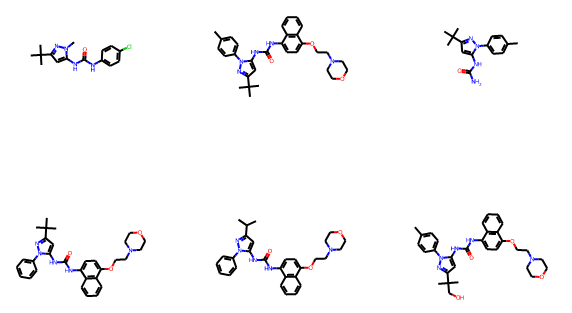

### a) Read in the data from the file data1.txt.

Use the NumPy function np.loadtxt('file_name',dtype='str'). 

Tranpose the data, so each column represents one different molecule, and each row represents one property.

Matrices can be transposed using the Numpy function np.transpose().


In [50]:
import numpy as np
import matplotlib.pyplot as plt
data_read = np.loadtxt('data/data1.txt')
print("Original matrix")
print(data_read)
data=np.transpose(data_read)
print("Transposed matrix:")
print(data)

Original matrix
[[ -0.854   306.797    58.95      4.015     3.        2.       21.
    2.     ]
 [ -5.081   527.669    80.65      5.98642   6.        2.       39.
    5.     ]
 [ -0.854   272.352    72.94      2.96882   3.        2.       20.
    2.     ]
 [ -4.824   513.642    80.65      5.678     6.        2.       38.
    5.     ]
 [ -3.42    499.615    80.65      5.5039    6.        2.       37.
    5.     ]
 [ -3.398   543.668   100.88      4.95882   7.        3.       40.
    5.     ]
 [ -2.481   451.571    80.65      4.2258    6.        2.       33.
    4.     ]
 [ -4.638   528.657    93.54      5.38142   7.        2.       39.
    5.     ]
 [ -4.42    570.738    83.89      6.05242   7.        2.       42.
    5.     ]
 [ -4.585   556.711    83.89      5.744     7.        2.       41.
    5.     ]
 [ -2.796   348.45     58.95      5.12222   3.        2.       26.
    3.     ]
 [ -3.921   398.51     58.95      6.27542   3.        2.       30.
    4.     ]
 [ -4.638   525.697    7

### b) Calculate the mean values of all properties (variables).

Note: in a 2D array, axis=0 will calculate the mean over all columns, and axis=1 over all rows.
    

In [51]:
mean = data.mean(axis=1)
print("Mean of each property:") 
print(mean)

Mean of each property:
[ -2.74751515 483.52133333  85.84666667   5.39154848   5.87878788
   2.15151515  35.33333333   4.42424242]


### c) Center the data matrix by subtracting the mean. Calculate the standard deviation of the centered data using the Numpy function `np.std()`.


In [52]:
mean_reshaped = np.reshape(mean, (-1, 1))
centered_data = data - mean_reshaped
print("Centered data:")
print(centered_data)
row_std = centered_data.std(axis=1)
print("Standard deviation of each property:")
print(row_std)

Centered data:
[[ 1.89351515e+00 -2.33348485e+00  1.89351515e+00 -2.07648485e+00
  -6.72484848e-01 -6.50484848e-01  2.66515152e-01 -1.89048485e+00
  -1.67248485e+00 -1.83748485e+00 -4.84848485e-02 -1.17348485e+00
  -1.89048485e+00  3.38515152e-01 -7.21484848e-01 -1.07648485e+00
   8.00515152e-01  1.70351515e+00 -5.64484848e-01  1.70651515e+00
   1.83051515e+00  1.86451515e+00  1.61351515e+00  6.99515152e-01
   1.24951515e+00  4.30515152e-01  1.46351515e+00  1.73351515e+00
  -1.65048485e+00 -2.87248485e+00 -2.52484848e-01  7.01515152e-01
   1.19451515e+00]
 [-1.76724333e+02  4.41476667e+01 -2.11169333e+02  3.01206667e+01
   1.60936667e+01  6.01466667e+01 -3.19503333e+01  4.51356667e+01
   8.72166667e+01  7.31896667e+01 -1.35071333e+02 -8.50113333e+01
   4.21756667e+01 -5.91233333e+00 -5.49853333e+01  5.81746667e+01
  -3.19913333e+01  2.93786667e+01  7.00766667e+01  1.49142667e+02
   1.50178667e+02  1.00936667e+01 -1.10061333e+02  4.60046667e+01
   1.99666667e+01  4.90486667e+01  7.71586

### d) Scale the data matrix by dividing the centered data by the standard deviation of the corresponding property.


In [53]:
row_std_reshaped = np.reshape(row_std, (-1, 1))
data_standardized = centered_data / row_std_reshaped
print("Data standardized:") 
print(data_standardized)


Data standardized:
[[ 1.29169345 -1.59182623  1.29169345 -1.41650933 -0.45874693 -0.44373926
   0.18180783 -1.28962627 -1.14091388 -1.25347143 -0.03307476 -0.80051257
  -1.28962627  0.23092385 -0.49217311 -0.73434238  0.54608498  1.16208173
  -0.3850729   1.16412823  1.24871693  1.2719106   1.1006867   0.47718611
   0.85237793  0.29368321  0.99836166  1.18254674 -1.12590621 -1.95951421
  -0.17223682  0.47855045  0.81485875]
 [-1.76788303  0.44163647 -2.11245771  0.3013157   0.16099492  0.60168438
  -0.31961899  0.45152005  0.87248237  0.73216159 -1.35120226 -0.85042105
   0.42190933 -0.05914473 -0.55005237  0.58195724 -0.32002913  0.29389301
   0.70102033  1.49196652  1.50233027  0.1009732  -1.10101173  0.46021319
   0.19973894  0.49066421  0.77186596 -0.28661704  0.56208005  2.16847131
  -1.21088148 -1.61167651 -1.76788303]
 [-1.36180611 -0.26311262 -0.65347791 -0.26311262 -0.26311262  0.76115325
  -0.26311262  0.38952144 -0.09906806 -0.09906806 -1.36180611 -1.36180611
  -0.73043708 -

### e) Calculate the covariance matrix of the scaled matrix using the NumPy function `np.cov()`.

In [54]:
cov_matrix = np.cov(data_standardized,rowvar=True)
print("Covariance matrix:") 
print(cov_matrix)

Covariance matrix:
[[ 1.03125    -0.3912139   0.04129218 -0.68284003 -0.16121934 -0.16833482
  -0.411931   -0.35172548]
 [-0.3912139   1.03125     0.77946738  0.6709619   0.92566202  0.34705324
   1.02380707  0.97624074]
 [ 0.04129218  0.77946738  1.03125     0.39521923  0.89232869  0.58954217
   0.74541357  0.700249  ]
 [-0.68284003  0.6709619   0.39521923  1.03125     0.51506774  0.25819815
   0.66530002  0.64577854]
 [-0.16121934  0.92566202  0.89232869  0.51506774  1.03125     0.36404367
   0.89909346  0.88273012]
 [-0.16833482  0.34705324  0.58954217  0.25819815  0.36404367  1.03125
   0.30769921  0.27687877]
 [-0.411931    1.02380707  0.74541357  0.66530002  0.89909346  0.30769921
   1.03125     0.9927973 ]
 [-0.35172548  0.97624074  0.700249    0.64577854  0.88273012  0.27687877
   0.9927973   1.03125   ]]


### f) Calculate the eigenvalues and eigenvectors of the covariance matrix.

We will apply functions of the np.linalg (Linear Algebra) package of the NumPy library.

Finding eigenvalues for a matrix is a common problem in the field of linear algebra. The eig function determines right-hand eigenvectors and their associated eigenvalues for any square matrix:

evals, evecs = np.linalg.eig(a).

In [55]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
rounded_eigenvalues = eigenvalues.round(2)
rounded_eigenvectors = eigenvectors.round(2)
print("Eigenvalues:")
print(rounded_eigenvalues)
print("Eigenvectors:") 
print(rounded_eigenvectors)

Eigenvalues:
[5.33 1.4  0.94 0.3  0.17 0.   0.04 0.07]
Eigenvectors:
[[ 0.18 -0.71 -0.25  0.37  0.46 -0.05  0.2   0.05]
 [-0.43 -0.   -0.15 -0.17  0.09  0.64  0.52 -0.27]
 [-0.36 -0.43  0.13  0.27 -0.42  0.07 -0.43 -0.48]
 [-0.32  0.45  0.12  0.8   0.2  -0.04  0.08  0.06]
 [-0.4  -0.23 -0.15  0.02 -0.48 -0.12  0.22  0.68]
 [-0.2  -0.23  0.88 -0.17  0.27 -0.04  0.12  0.15]
 [-0.43  0.03 -0.19 -0.23  0.18 -0.73  0.21 -0.34]
 [-0.41  0.01 -0.24 -0.2   0.48  0.18 -0.63  0.28]]


### Calculate which percentage of the variance is explained by each eigenvector.

In [57]:
total=np.sum(eigenvalues)
explained_var=(eigenvalues*100)/total
print("Variance explained by each eigenvector:")
for x in explained_var:
    print("%.2f" % x, "%")

Variance explained by each eigenvector:
64.57 %
17.02 %
11.34 %
3.65 %
2.02 %
0.03 %
0.50 %
0.87 %


This means that the first eigenvector explains 64.57% of the total variance in the data set, while the first and second eigenvectors together account for 81.59% of the total variance. This means that we can effectively reduce the dimensionality of the data set by looking only at the first two eigenvectors, instead of looking at all the 8 molecular properties of the original data set. 

The principal components are sorted by their associated eigenvalues, or by the amount of variance they explain. This means, in this example, that the first eigenvector is the first principal component, while the second eigenvector is the second principal component.

### g) Identify the first and second principal components by finding the eigenvectors that correspond to the two largest eigenvalues. Create a loading plot for the 1st and 2nd principal components.

Don't forget to define the transpose of the eigenvector matrix (sorted by explained variance) as the loading matrix. 

Use the NumPy function np.argsort() to identify the largest eigenvalues. This can be used to determine the indices for a correspondingly sorted array.

Loading - First principal component: [ 0.1836438  -0.42925787 -0.35757805 -0.31736204 -0.40253386 -0.20118559
 -0.42513125 -0.41253628]
Loading - Second principal component: [-0.71244559 -0.00124452 -0.42891446  0.45003982 -0.22552206 -0.23246739
  0.02895478  0.01329003]
Loading matrix: [[ 0.1836438  -0.42925787 -0.35757805 -0.31736204 -0.40253386 -0.20118559
  -0.42513125 -0.41253628]
 [-0.71244559 -0.00124452 -0.42891446  0.45003982 -0.22552206 -0.23246739
   0.02895478  0.01329003]
 [-0.25282613 -0.15346804  0.12995674  0.11700683 -0.15481373  0.87544187
  -0.19020161 -0.23538212]
 [ 0.37374459 -0.16942423  0.27112078  0.79521632  0.02438862 -0.16969826
  -0.2334956  -0.20450533]
 [ 0.4591959   0.0927965  -0.42295779  0.19567167 -0.48113395  0.26785966
   0.18014346  0.47713404]
 [ 0.0545373  -0.26937313 -0.4802061   0.06420337  0.68486326  0.15357646
  -0.3430791   0.28181048]
 [ 0.19799279  0.52286658 -0.42803065  0.08116054  0.21766027  0.11581514
   0.20563129 -0.62812321]
 [-0

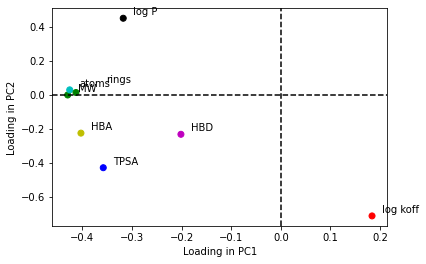

In [66]:
ieigenval = np.argsort(-eigenvalues)
ipc1 = ieigenval[0]
ipc2 = ieigenval[1]
principal_component_1 = eigenvectors[:, ipc1]
principal_component_2 = eigenvectors[:, ipc2]
print("Loading - First principal component:", principal_component_1)
print("Loading - Second principal component:", principal_component_2)
loadingmatrix = np.transpose(eigenvectors[:,ieigenval])
print("Loading matrix:", loadingmatrix)
colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c', 'g']
labels = ['log koff', 'MW', 'TPSA', 'log P', 'HBA', 'HBD', 'atoms', 'rings'] 
for i in range(len(labels)-1):
    x = loadingmatrix[0,i] 
    y = loadingmatrix[1,i] 
    plt.text(x+0.02, y+0.02, labels[i])
plt.text(loadingmatrix[0,7]+0.06, loadingmatrix[1,7]+0.06, labels[7])
plt.scatter(loadingmatrix[0],loadingmatrix[1], c=colors)
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Loading in PC1")
plt.ylabel("Loading in PC2")
plt.show()

The first principal component is a linear combination of the original properties, with weights given by the components of the eigenvector. The MW, number of aromatic rings and number of heavy atoms have the largest contributions to this component.

Note that in the first principal component there is a negative correlation between koff and the other properties. In the second principal component there is a negative correlation between log P and koff, and a positive correlation between koff and TPSA.

### h) Represent the score plot of the data set by projecting the data matrix onto the new coordinate system (the loading matrix).

[[ 4.38951566e+00 -9.82060182e-01  4.68765418e+00 -7.28919879e-01
  -3.76293442e-01 -1.55072072e+00  9.79530242e-01 -1.18603027e+00
  -1.56316685e+00 -1.36289290e+00  2.93251269e+00  1.58583572e+00
  -7.12282939e-01  5.58418335e-01  1.00420775e+00 -1.04553303e+00
   3.72885114e-01 -3.23251844e-01 -2.40180777e+00 -2.64118377e+00
  -2.61911297e+00 -5.49351081e-02  1.68890412e+00 -1.25984892e+00
  -7.60815507e-01  5.18767473e-01 -2.16375474e+00  3.21366126e-02
  -1.59351801e+00 -5.86880019e+00  2.68601200e+00  3.45660124e+00
   4.30194792e+00]
 [-6.36563838e-01  1.60121533e+00 -1.43222089e+00  1.32851729e+00
   5.61055134e-01 -7.20738271e-01 -5.19375289e-01  6.99834090e-01
   1.12817011e+00  1.06056695e+00  8.55695692e-01  1.96820878e+00
   1.96863030e+00 -2.63150327e-01  1.43599969e+00  1.13809903e+00
  -8.11443948e-01 -1.48458411e+00 -7.31986548e-01 -1.33526475e+00
  -2.38388633e+00 -1.34428747e+00 -1.58223110e+00 -1.92785787e-01
  -7.51306997e-01  3.31898182e-01 -1.21447604e+00 -1.2893

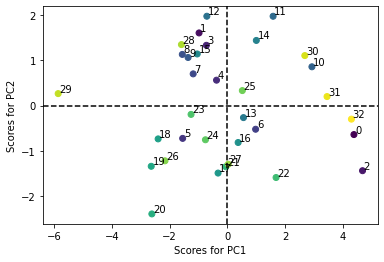

In [62]:
scorematrix = loadingmatrix@data_standardized
print(scorematrix)
scores_pc1 = scorematrix[ipc1]
scores_pc2 = scorematrix[ipc2]
for i in range(len(scores_pc1)):
    x = scores_pc1[i] 
    y = scores_pc2[i] 
    plt.text(x+0.04, y+0.04, i)
plt.scatter(scores_pc1,scores_pc2, c=range(len(scores_pc1)), cmap='viridis')
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Scores for PC1")
plt.ylabel("Scores for PC2")
plt.show()


In the plot above (scores plot), in a new coordinate system, molecules with a value above 0 in the x axis have values above the average for principal component 1, while molecules with a value below 0 have values below the average for principal component 1.

Note that molecules 20 and 29 are far way from the others, indicating that they represent more diverse chemistry regarding the principal components 1 and 2. Molecules 6, 13 and 16, on the other hand, are close to each other, which is an indication that they have similar properties.



PCA can also be performed with the function PCA(), available in the Scikit-learn library:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Remember to center and scale your matrix before using this function.

The matrix can be centered and scaled with the function StandardScaler, available in the Scikit-learn library:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

## Exercise

Using the steps above, perform a principal component analysis using the data provided in the file data2.txt.

The file data2.txt contains information for 77 small molecules which are inhibitors of heat shock protein 90 (HSP90).
The file data2.txt contains the following information:
- column 1: log of dissociation rate constants (log koff, in log s-1)
- column 2: molecular weight (MW)
- column 3: number of hydrogen bond acceptors (HBA)
- column 4: number of hydrogen bond donors (HBD)
- column 5: topological polar surface area (TPSA)
- column 6: log of octanol-water partition coefficient (log P)
- column 7: molar refractivity
- column 8: number of rotatable bonds

What is the composition of the first principal component?

What is the correlation between koff and the other properties, considering the first and second principal components?

Can you identify molecules which represent more diverse chemistry?